# 1 Imports

In [2]:
import mysql.connector as connection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore", UserWarning)

# 2 Data Input Pipeline

In [4]:
queries = []
dataframes = []

try:
    db = connection.connect(
        host="localhost",
        database="F1",
        user="root",
        passwd="password", #if you run your local MySQL server make sure to put your current details here
        use_pure=True
    )
    queries.append("SELECT * from circuits;")
    queries.append("SELECT * from constructorresults;")
    queries.append("SELECT * from constructors;")
    queries.append("SELECT * from constructorstandings;")
    queries.append("SELECT * from drivers;")
    queries.append("SELECT * from driverstandings;")
    queries.append("SELECT * from laptimes;")
    queries.append("SELECT * from pitstops;")
    queries.append("SELECT * from qualifying;")
    queries.append("SELECT * from races;")
    queries.append("SELECT * from results;")
    queries.append("SELECT * from seasons;")
    queries.append("SELECT * from sprintresults;")
    queries.append("SELECT * from status;")

    circuits_df = pd.read_sql(queries[0], db)
    constructorresults_df = pd.read_sql(queries[1], db)
    constructors_df = pd.read_sql(queries[2], db)
    constructorstandings_df = pd.read_sql(queries[3], db)
    drivers_df = pd.read_sql(queries[4], db)
    driverstandings_df = pd.read_sql(queries[5], db)
    laptimes_df = pd.read_sql(queries[6], db)
    pitstops_df = pd.read_sql(queries[7], db)
    qualifying_df = pd.read_sql(queries[8], db)
    races_df = pd.read_sql(queries[9], db)
    results_df = pd.read_sql(queries[10], db)
    seasons_df = pd.read_sql(queries[11], db)
    sprintresults_df = pd.read_sql(queries[12], db)
    status_df = pd.read_sql(queries[13], db)

    db.close()

except Exception as e:
    db.close()
    print(str(e))

# 3 Write dataframes to CSV's for convenience

In [5]:
circuits_df.to_csv(
    r'CSVs\circuits_df.csv',
    index=False
)

# 4 Find and fix NaN values

In [6]:
dataframes = [
    circuits_df,
    constructorresults_df,
    constructors_df,
    constructorstandings_df,
    drivers_df,
    driverstandings_df,
    laptimes_df,
    pitstops_df,
    qualifying_df,
    races_df,
    results_df,
    seasons_df,
    sprintresults_df,
    status_df
]

dataframes_names = [
    'circuits_df',
    'constructorresults_df',
    'constructors_df',
    'constructorstandings_df',
    'drivers_df',
    'driverstandings_df',
    'laptimes_df',
    'pitstops_df',
    'qualifying_df',
    'races_df',
    'results_df',
    'seasons_df',
    'sprintresults_df',
    'status_df'
]

In [7]:
def find_nan(data):
    nan_values = data.isna()
    nan_columns = nan_values.any()
    columns_with_nan = data.columns[nan_columns].tolist()
    print(columns_with_nan)

In [8]:
for idx, dataframe in enumerate(dataframes):
    print(dataframes_names[idx])
    find_nan(dataframe)

circuits_df
['alt']
constructorresults_df
['status']
constructors_df
[]
constructorstandings_df
[]
drivers_df
['number', 'code']
driverstandings_df
[]
laptimes_df
[]
pitstops_df
[]
qualifying_df
['q1', 'q2', 'q3']
races_df
['time']
results_df
['number', 'position', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed']
seasons_df
[]
sprintresults_df
['position', 'time', 'milliseconds', 'fastestLap', 'fastestLapTime']
status_df
[]


Circuits, Constructorresults, Drivers, Qualifying, Results and Sprintresults contain NaN values.

## 4.1 Circuits

The Altitudes for Al Dayeen and Miami are missing

In [9]:
circuits_df.loc[circuits_df['alt'].isna()]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.4542,NaN,http://en.wikipedia.org/wiki/Losail_Internatio...
78,79,miami,Miami International Autodrome,Miami,United States,25.9581,-80.2389,NaN,http://en.wikipedia.org/wiki/Miami_Internation...


We could not find the altitude of the Losail International Circuit, but the neighboring city of Doha is at 3m which we're using here. Same goes for the Miami International Autodrome. Here Miami's altitude of 2m was chosen.

In [10]:
circuits_df['alt'] = circuits_df['alt'].replace([np.nan, np.nan], [2,3])

In [11]:
circuits_df.iloc[[77]]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49,51.4542,3.0,http://en.wikipedia.org/wiki/Losail_Internatio...


## 4.2 Constructor Results

In [12]:
len(constructorresults_df)

11950

In [13]:
constructorresults_df.loc[constructorresults_df['status'].isna()]

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,None
1,2,18,2,8.0,None
2,3,18,3,9.0,None
3,4,18,4,5.0,None
4,5,18,5,2.0,None
...,...,...,...,...,...
11945,16445,1073,214,6.0,None
11946,16446,1073,117,0.0,None
11947,16447,1073,210,0.0,None
11948,16448,1073,3,0.0,None


Since 11933 out of the 11950 entries in the status column are 'None', it is safe to drop it!

In [14]:
constructorresults_df = constructorresults_df.drop(columns='status')

## 4.3 Drivers

In [15]:
len(drivers_df)

854

In [16]:
drivers_df.loc[drivers_df['number'].isna()]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,NaN,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,NaN,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
9,10,glock,NaN,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock
...,...,...,...,...,...,...,...,...,...
813,814,resta,NaN,DIR,Paul,di Resta,1986-04-16,British,http://en.wikipedia.org/wiki/Paul_di_Resta
815,816,ambrosio,NaN,DAM,Jérôme,d'Ambrosio,1985-12-27,Belgian,http://en.wikipedia.org/wiki/J%C3%A9r%C3%B4me_...
818,819,pic,NaN,PIC,Charles,Pic,1990-02-15,French,http://en.wikipedia.org/wiki/Charles_Pic
822,823,garde,NaN,VDG,Giedo,van der Garde,1985-04-25,Dutch,http://en.wikipedia.org/wiki/Giedo_van_der_Garde


Once again, 804 out of 854 are NaN, so we drop 'number'.

In [17]:
drivers_df = drivers_df.drop(columns='number')

In [18]:
drivers_df.loc[drivers_df['code'].isna()]

,driverId,driverRef,code,forename,surname,dob,nationality,url
42,43,matta,None,Cristiano,da Matta,1973-09-19,Brazilian,http://en.wikipedia.org/wiki/Cristiano_da_Matta
43,44,panis,None,Olivier,Panis,1966-09-02,French,http://en.wikipedia.org/wiki/Olivier_Panis
44,45,pantano,None,Giorgio,Pantano,1979-02-04,Italian,http://en.wikipedia.org/wiki/Giorgio_Pantano
45,46,bruni,None,Gianmaria,Bruni,1981-05-30,Italian,http://en.wikipedia.org/wiki/Gianmaria_Bruni
46,47,baumgartner,None,Zsolt,Baumgartner,1981-01-01,Hungarian,http://en.wikipedia.org/wiki/Zsolt_Baumgartner
...,...,...,...,...,...,...,...,...
802,802,serafini,None,Dorino,Serafini,1909-07-22,Italian,http://en.wikipedia.org/wiki/Dorino_Serafini
803,803,cantrell,None,Bill,Cantrell,1908-01-31,American,http://en.wikipedia.org/wiki/William_Cantrell
804,804,mantz,None,Johnny,Mantz,1918-09-18,American,http://en.wikipedia.org/wiki/Johnny_Mantz
805,805,kladis,None,Danny,Kladis,1917-02-10,American,http://en.wikipedia.org/wiki/Danny_Kladis


Same reasoning as above, 'code' can be removed!

In [19]:
drivers_df = drivers_df.drop(columns='code')

## 4.4 Qualifying - Work in Progress

In [20]:
len(qualifying_df)

9135

In [21]:
qualifying_df.loc[qualifying_df['q3'].isna()]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
9,10,18,20,5,15,10,1:26.702,1:25.842,None
10,11,18,22,11,17,11,1:26.369,1:26.173,None
11,12,18,4,4,5,12,1:26.907,1:26.188,None
12,13,18,18,11,16,13,1:26.712,1:26.259,None
13,14,18,6,3,8,14,1:26.891,1:26.413,None
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,None,None
9131,9172,1073,847,3,63,17,1:24.423,None,None
9132,9173,1073,8,51,7,18,1:24.779,None,None
9133,9174,1073,854,210,47,19,1:24.906,None,None


In [22]:
qualifying_df.loc[qualifying_df['q3'].isna()]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
9,10,18,20,5,15,10,1:26.702,1:25.842,None
10,11,18,22,11,17,11,1:26.369,1:26.173,None
11,12,18,4,4,5,12,1:26.907,1:26.188,None
12,13,18,18,11,16,13,1:26.712,1:26.259,None
13,14,18,6,3,8,14,1:26.891,1:26.413,None
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,None,None
9131,9172,1073,847,3,63,17,1:24.423,None,None
9132,9173,1073,8,51,7,18,1:24.779,None,None
9133,9174,1073,854,210,47,19,1:24.906,None,None


We interpret NaN values in the Qualifying as the fact that the driver didn't manage to register a time here.

## 4.5 Races

In [24]:
len(races_df)

1079

In [25]:
races_df.loc[races_df['time'].isna()]

,raceId,year,round,circuitId,name,date,time,url
89,90,2004,1,1,Australian Grand Prix,2004-03-07,NaT,http://en.wikipedia.org/wiki/2004_Australian_G...
90,91,2004,2,2,Malaysian Grand Prix,2004-03-21,NaT,http://en.wikipedia.org/wiki/2004_Malaysian_Gr...
91,92,2004,3,3,Bahrain Grand Prix,2004-04-04,NaT,http://en.wikipedia.org/wiki/2004_Bahrain_Gran...
92,93,2004,4,21,San Marino Grand Prix,2004-04-25,NaT,http://en.wikipedia.org/wiki/2004_San_Marino_G...
93,94,2004,5,4,Spanish Grand Prix,2004-05-09,NaT,http://en.wikipedia.org/wiki/2004_Spanish_Gran...
...,...,...,...,...,...,...,...,...
834,835,1950,3,19,Indianapolis 500,1950-05-30,NaT,http://en.wikipedia.org/wiki/1950_Indianapolis...
835,836,1950,4,66,Swiss Grand Prix,1950-06-04,NaT,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
836,837,1950,5,13,Belgian Grand Prix,1950-06-18,NaT,http://en.wikipedia.org/wiki/1950_Belgian_Gran...
837,838,1950,6,55,French Grand Prix,1950-07-02,NaT,http://en.wikipedia.org/wiki/1950_French_Grand...


Reformat into hours

In [26]:
races_df['time'] = races_df['time'].dt.seconds / 3600

Let's examine the missing values in the time column.

In [27]:
races_df['time'].describe()

count    348.000000
mean      12.335728
std        3.440624
min        3.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       20.000000
Name: time, dtype: float64

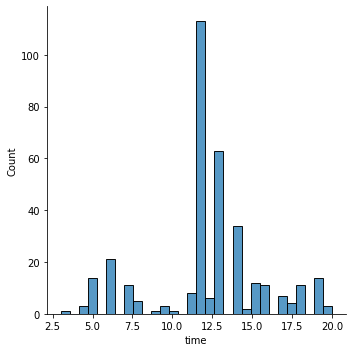

In [28]:
sns.displot(data=races_df['time'])

It seems sensible to replace the NaN values with the mean of the columns since we're going to be using the time to get weather data anyways.

In [29]:
def fix_na(data):
    data['time'] = data['time'].fillna(data['time'].mean())
    data['time'] = data['time']
    return data

In [30]:
races_df = fix_na(races_df)

Realizing that the upcoming races in 2022 are already listed here, we remove those entries.

In [31]:
races_df = races_df.loc[races_df['year'] < 2022]

In [32]:
races_df

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,6.0,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,9.0,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,7.0,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12.0,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12.0,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1053,1069,2021,17,69,United States Grand Prix,2021-10-24,19.0,http://en.wikipedia.org/wiki/2021_United_State...
1054,1070,2021,18,32,Mexico City Grand Prix,2021-11-07,19.0,http://en.wikipedia.org/wiki/2021_Mexican_Gran...
1055,1071,2021,19,18,São Paulo Grand Prix,2021-11-14,17.0,http://en.wikipedia.org/wiki/São_Paulo_Grand_Prix
1056,1072,2021,21,77,Saudi Arabian Grand Prix,2021-12-05,17.5,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...


## 4.6 Results

In [33]:
len(results_df)

25400

In [34]:
results_df['position'].describe()

count    14613.000000
mean         7.912954
std          4.796383
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         33.000000
Name: position, dtype: float64

In [35]:
results_df.loc[results_df['fastestLap'].isna()]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
16,17,18,17,9,10.0,14,NaN,R,17,0.0,0,None,NaN,NaN,NaN,None,None,4
17,18,18,18,11,16.0,12,NaN,R,18,0.0,0,None,NaN,NaN,NaN,None,None,4
18,19,18,19,8,19.0,21,NaN,R,19,0.0,0,None,NaN,NaN,NaN,None,None,4
19,20,18,20,5,15.0,9,NaN,R,20,0.0,0,None,NaN,NaN,NaN,None,None,4
20,21,18,21,10,21.0,16,NaN,R,21,0.0,0,None,NaN,NaN,NaN,None,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25199,25205,1063,840,117,18.0,19,20.0,20,20,0.0,1,+44.108,251179.0,NaN,0.0,None,None,1
25239,25245,1065,852,213,22.0,0,NaN,W,20,0.0,0,None,NaN,NaN,0.0,None,None,23
25318,25324,1070,854,210,47.0,14,NaN,R,19,0.0,0,None,NaN,NaN,0.0,None,None,4
25319,25325,1070,852,213,22.0,17,NaN,R,20,0.0,0,None,NaN,NaN,0.0,None,None,4


Since only numererical values make sense to evaluate rankings, all NaN values were dropped. We did not want to average rankings or anything like that as we would risk to significantely falsify the results.

In [36]:
results_df = results_df.dropna(axis=0)

In [37]:
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25386,25392,1073,846,1,4.0,3,7.0,7,7,6.0,58,+59.200,5476545.0,58.0,4.0,1:26.762,219.123,1
25387,25393,1073,4,214,14.0,11,8.0,8,8,4.0,58,+1:01.708,5479053.0,58.0,8.0,1:27.607,217.010,1
25388,25394,1073,839,214,31.0,9,9.0,9,9,2.0,58,+1:04.026,5481371.0,58.0,10.0,1:28.249,215.431,1
25389,25395,1073,844,6,16.0,7,10.0,10,10,1.0,58,+1:06.057,5483402.0,40.0,12.0,1:28.433,214.983,1


## 4.7 Sprintresults

In [38]:
len(sprintresults_df)

60

In [39]:
sprintresults_df.loc[sprintresults_df['fastestLapTime'].isna()]

,sprintResultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
39,40,1065,842,213,10,20,NaN,R,20,0.0,0,None,NaN,NaN,None,3


We don't worry too much about the Sprintresults as it contains very little data anyways. Sprintraces are a very recent addition to F1, and will therefore not be taken into account in our analysis.

# 5 Visualization

## 5.1 Most populat Grand Prix

The most popular grand prix those that the most races happened in. 
We merged the races_df and circuits_df for this purpose.

In [40]:
race_info = pd.merge(left=races_df, right=circuits_df, left_on='circuitId', right_on='circuitId')


Text(0, 0.5, 'Number of race')

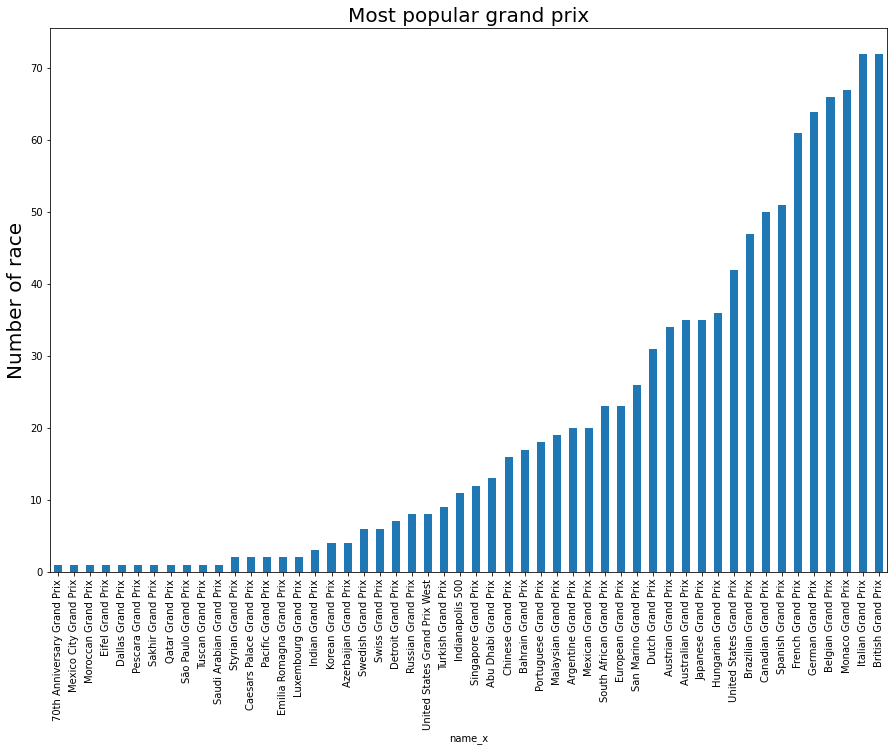

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
race_info.groupby('name_x')['raceId'].nunique().sort_values().plot(ax=ax,kind = 'bar')
plt.title('Most popular grand prix', fontsize=20)
plt.ylabel('Number of race',fontsize=20)


The most popular locations are British Grand Prix, Italian Grand Prix, Monaco Grand Prix, Belgian, French, and German Grand Prix

## 5.2 Plot driver age versus fastest lap (merge races_df, results_df, drivers_df)

In [42]:
df_1 = pd.merge(races_df, results_df, how='right', 
               on=['raceId']).drop(['url','points'], axis = 1)
df_2 = pd.merge(df_1, drivers_df, how='inner', 
               on=['driverId'])


In [43]:
# calculate age of drivers by substracting the time when the race happens and the driver's date of birth

from dateutil.relativedelta import *
df_2['date'] = pd.to_datetime(df_2.date)
df_2['dob'] = pd.to_datetime(df_2.dob)
df_2['driver_age'] = df_2.apply(lambda x: 
                                        relativedelta(x['date'], x['dob']).years, axis=1)
df_2.drop(['date', 'dob'], axis = 1, inplace = True)

In [44]:
#Caculate fastest lap time in seconds
df_2['fastestLapTimeInSec'] = pd.to_datetime(df_2['fastestLapTime'], format='%M:%S.%f').dt.minute*60 + pd.to_datetime(df_2['fastestLapTime'], format='%M:%S.%f').dt.second + pd.to_datetime(df_2['fastestLapTime'], format='%M:%S.%f').dt.microsecond/1000000


In [45]:
df_2['driver_age'].astype(float)

0       23.0
1       23.0
2       23.0
3       23.0
4       23.0
        ... 
3397    21.0
3398    21.0
3399    22.0
3400    22.0
3401    22.0
Name: driver_age, Length: 3402, dtype: float64

<AxesSubplot:title={'center':'Average fastest lap time per driver age'}, xlabel='driver_age'>

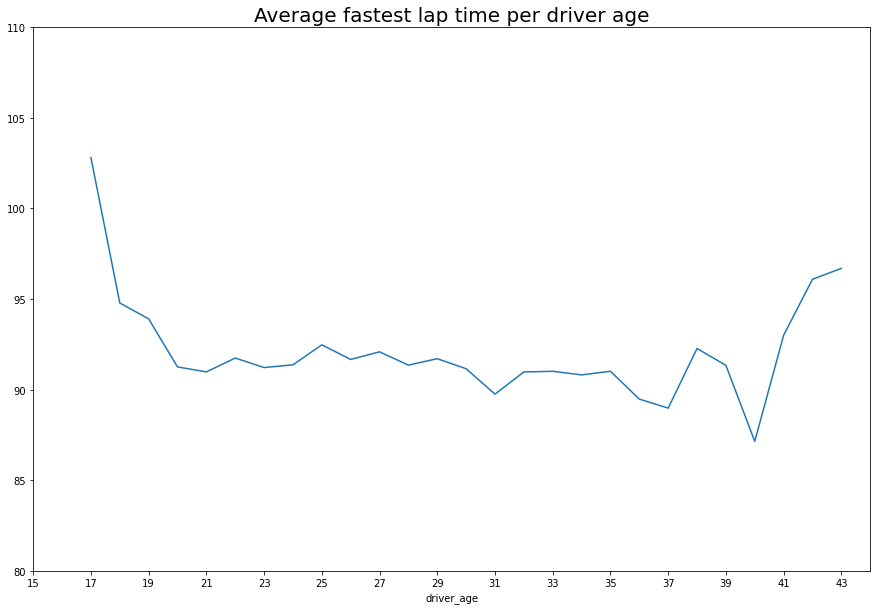

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim([16, 44])
ax.set_ylim([80, 110])
ax.set_title("Average fastest lap time per driver age", fontsize=20)
ax.xaxis.set_ticks(np.arange(15, 45, 2))
df_2.groupby('driver_age').fastestLapTimeInSec.mean().plot(ax=ax)


## 5.3 Plot driver age versus win counts 

In [47]:
df_3 = pd.merge(df_2, driverstandings_df, how='inner', 
               on=['driverId'])

In [48]:
df_3.head(3)

,raceId_x,year,round,circuitId,name,time_x,resultId,driverId,constructorId,number,...,nationality,url,driver_age,fastestLapTimeInSec,driverStandingsId,raceId_y,points,position_y,positionText_y,wins
0,18,2008,1,1,Australian Grand Prix,4.5,1,1,1,22.0,...,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,87.452,1,18,10.0,1,1,1
1,18,2008,1,1,Australian Grand Prix,4.5,1,1,1,22.0,...,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,87.452,9,19,14.0,1,1,1
2,18,2008,1,1,Australian Grand Prix,4.5,1,1,1,22.0,...,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,87.452,27,20,14.0,3,3,1


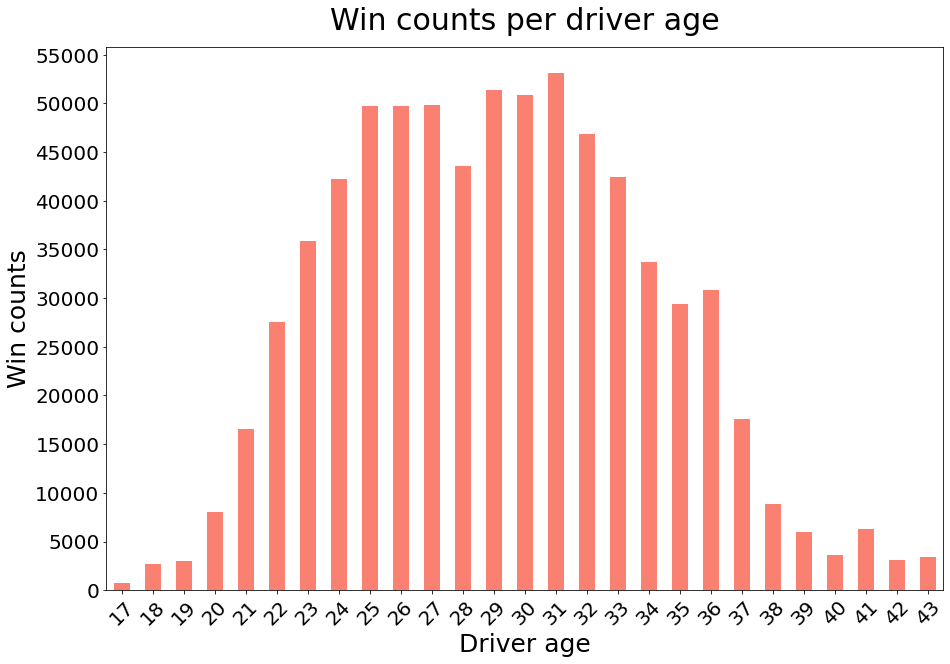

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim([16, 44])
ax.set_title("Win counts per driver age",x=0.5, y=1.02,fontsize=30)
ax.xaxis.set_ticks(np.arange(15, 45, 2))
ax.yaxis.set_ticks(np.arange(0, 57500, 5000))
df_3.groupby('driver_age').wins.count().plot(ax=ax, kind='bar',color='salmon')
plt.xticks(fontsize=20,rotation = 45)
plt.yticks(fontsize=20)
ax.set_xlabel('Driver age', fontsize=25)
ax.set_ylabel('Win counts', fontsize=25)  

fig.savefig('Win_counts_per_age.jpg')

## 5.4 Plot number of pitstops at time of the race (merge pitstops_df, races_df, circuits_df)

In [50]:
races_df = races_df.drop(['time','url'], axis=1)
df_4 = pd.merge(races_df, pitstops_df, how='inner', 
               on=['raceId'])

In [51]:
#since each race has different number of laps, we normalize the number of laps per race

grouper = laptimes_df.groupby('raceId')['lap']     #the laptimes_df gives how many laps are there in each race                                                                         
maxx = grouper.transform('max')                                                                                   
minn = grouper.transform('min')                                                                                    
  
result = df_4.assign(lap=(df_4.lap+1 - minn)/(maxx - minn))                                                       
result                                                                                                             


,raceId,year,round,circuitId,name,date,driverId,stop,lap,time,duration,milliseconds
0,841,2011,1,1,Australian Grand Prix,2011-03-27,153,1,0.017544,0 days 17:05:23,26.898,26898
1,841,2011,1,1,Australian Grand Prix,2011-03-27,30,1,0.017544,0 days 17:05:52,25.021,25021
2,841,2011,1,1,Australian Grand Prix,2011-03-27,17,1,0.192982,0 days 17:20:48,23.426,23426
3,841,2011,1,1,Australian Grand Prix,2011-03-27,4,1,0.210526,0 days 17:22:34,23.251,23251
4,841,2011,1,1,Australian Grand Prix,2011-03-27,13,1,0.228070,0 days 17:24:10,23.842,23842
...,...,...,...,...,...,...,...,...,...,...,...,...
8824,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,840,2,0.753623,0 days 18:22:55,22.661,22661
8825,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,815,3,0.768116,0 days 18:23:09,21.385,21385
8826,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,854,2,0.753623,0 days 18:23:42,22.070,22070
8827,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,852,2,0.768116,0 days 18:24:01,21.909,21909


In [52]:
#Divide the time of the race into 20 intervals
result['time_of_race'] = pd.cut(result['lap'], bins=[0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0, float('Inf')], 
                                labels=['0','0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5','0.55','0.6','0.65','0.7','0.75','0.8','0.85','0.9','0.95','1'])

result['time_of_race']=result['time_of_race'].astype('float')

In [53]:
#Count the number of pitstops per time of race and per circuits
dataa= result[['time_of_race','name']]
dataa["count"] = dataa.groupby("time_of_race").transform('count')
dataa.sort_values(by=['time_of_race'],ascending=False)
dataa = dataa.drop_duplicates()
dataa

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_18012\2941553270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa["count"] = dataa.groupby("time_of_race").transform('count')


,time_of_race,name,count
0,0.00,Australian Grand Prix,569
2,0.15,Australian Grand Prix,747
3,0.20,Australian Grand Prix,647
9,0.25,Australian Grand Prix,680
21,0.30,Australian Grand Prix,591
...,...,...,...
8762,0.15,Saudi Arabian Grand Prix,747
8781,0.20,Saudi Arabian Grand Prix,647
8797,0.30,Saudi Arabian Grand Prix,591
8798,0.35,Saudi Arabian Grand Prix,602


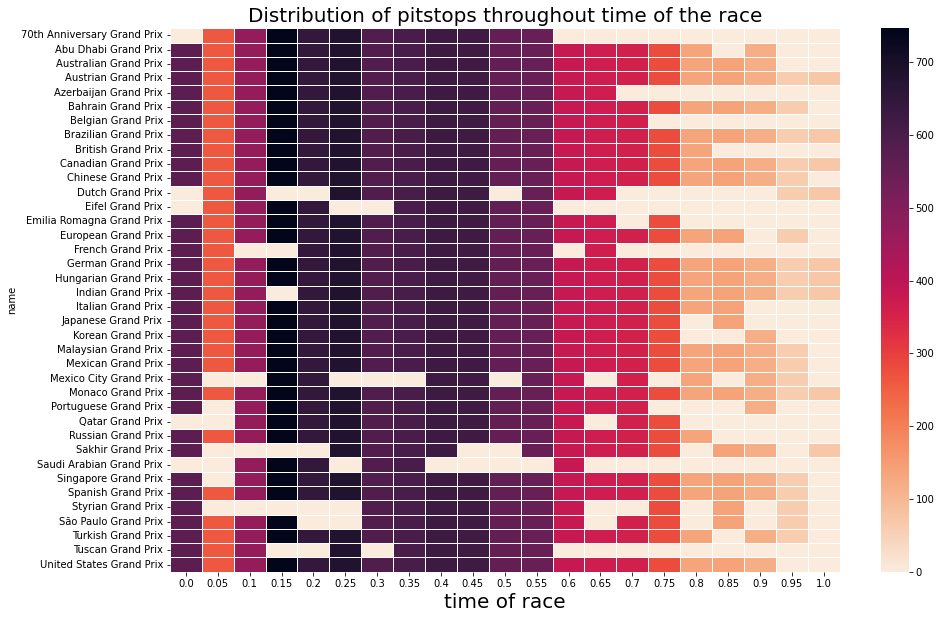

In [54]:
cmap = sns.cm.rocket_r

flights = dataa.pivot("name", "time_of_race", "count").fillna(0)
f, ax = plt.subplots(figsize=(15, 10))
sns_plot= sns.heatmap(flights, annot=False,linewidths=0.8, ax=ax,cmap = cmap)
plt.xlabel('time of race',fontsize=20)
plt.title('Distribution of pitstops throughout time of the race',fontsize=20)
plt.show()
fig = sns_plot.get_figure()
fig.savefig("Distribution of pitstops")

## 5.5 How number of pit stops change over year 

In [55]:
#Calculate the average number of pitstops per race over the race
round(result['year'].value_counts()/result.groupby('year').raceId.nunique())

2011    59.0
2012    47.0
2013    50.0
2014    43.0
2015    39.0
2016    47.0
2017    35.0
2018    26.0
2019    31.0
2020    35.0
2021    38.0
dtype: float64

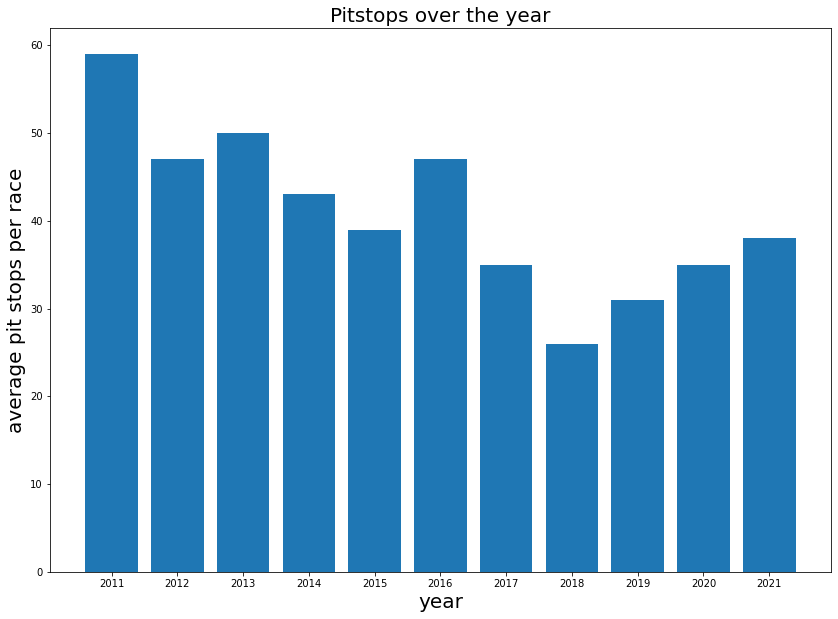

In [56]:
plt.figure(figsize=[14, 10])
plt.bar(['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'], [59.0,47.0,50.0,43.0,39.0,47.0,35.0,26.0,31.0,35.0,38.0])
plt.xlabel('year',fontsize=20)
plt.ylabel('average pit stops per race',fontsize=20)
plt.title('Pitstops over the year',fontsize=20)

plt.show()

Number of pit stops per race experienced a downward trend until 2018, then increased again

## 5.6 Explore relatioship between starting and finishing position

Variables:
grid: The starting position before the race.
positionOrder: the finishing position

In [57]:
df1 = pd.merge(results_df,races_df[['raceId','year', 'name','round']],on='raceId', how='left').drop(['year','name'],axis=1)
df2 = pd.merge(df1,drivers_df[['driverId','driverRef', 'nationality']],on='driverId', how='left').drop(['nationality'],axis=1)
df3 = pd.merge(df2,constructors_df[['constructorId', 'name','nationality']],on='constructorId', how='left')

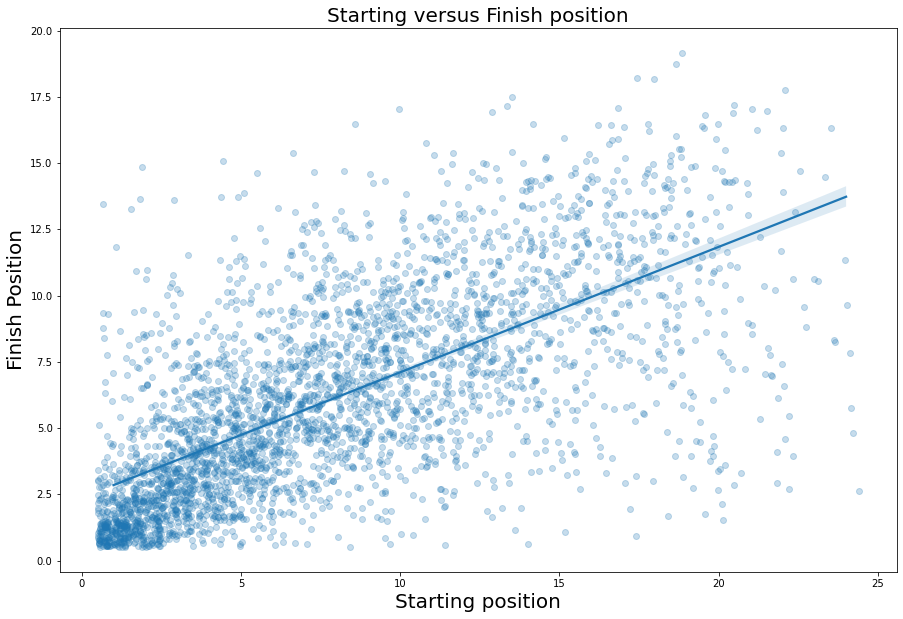

In [58]:
# Exclude data points where grid = 0
df_excl = df3[df3['grid'] != 0]

# create a plot
plt.figure(figsize = [15, 10])
sns.regplot(data = df_excl, x = 'grid', y = 'positionOrder', x_jitter = 0.5, y_jitter = 0.5, scatter_kws = {'alpha' : 1/4});
plt.title('Starting versus Finish position',fontsize=20)
plt.ylabel('Finish Position',fontsize=20)
plt.xlabel('Starting position',fontsize=20);

We can see that there is a linear relationship between starting and finishing position 

## 5.7 What are the reasons (status) for not finishing a race per constructor and year?

Group similar features into bins, create timelapse of reasons for not finishing. Only take into account the 10 teams with most data points for each year.

In [59]:
# Create unmodified results_df
db = connection.connect(
        host="localhost",
        database="F1",
        user="root",
        passwd="password",
        use_pure=True
    )
results_df_full = pd.read_sql(queries[10], db)
db.close()

In [60]:
import seaborn as sns

In [72]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [73]:
pd.options.mode.chained_assignment = None  # default='warn'

In [74]:
def create_yearly_exploration(data, year):
    return data[data['year'] == year]

In [75]:
def get_ten_constructors(data, n=10):
    constructor_list = data['constructor'].value_counts()[:n].index.tolist()
    data = data.loc[data['constructor'].isin(constructor_list)]
    return data

In [76]:
def add_data(data):
    stats=['Mechanical','Overlapped','Finished','Accident','Electical','Rules','Human','Disqualified']
    constructor_list = data['constructor'].value_counts()[:10].index.tolist()

    for i in range(len(constructor_list)):
        for j in range(len(stats)):
            data = data.append({'year': year,
                                'constructor':constructor_list[i], 
                                'status': stats[j]}, ignore_index=True)


    return data

In [83]:
def pipeline_yearly_evolution(year):
    status_df_cateogrized = pd.read_csv("CSVs\status_df_general.csv")
    data = results_df_full[['raceId', 'constructorId', 'statusId']]

    data['year'] = data['raceId'].map(races_df.set_index('raceId')['year'])
    data['constructor'] = data['constructorId'].map(constructors_df.set_index('constructorId')['name'])
    data['status'] = data['statusId'].map(status_df_cateogrized.set_index('statusId')['status_general'])
    data = data.drop(columns=['raceId', 'constructorId', 'statusId'])

    data = create_yearly_exploration(data=data, year=year)
    data = get_ten_constructors(data, n=10)

    data = add_data(data)

    data['count'] = data.groupby('status')['constructor'].transform('count')
    data = data.drop_duplicates()
    return data

In [86]:
def heatmap(data,year):
    cmap = sns.cm.rocket_r
    flights = data.pivot("status", "constructor", "count").fillna(0)
    f, ax = plt.subplots(figsize=(18, 16))
    sns_plot = sns.heatmap(flights, annot=False,linewidths=0.8, ax=ax,cmap = cmap,vmin=0, vmax=205)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, fontsize=25)
    ax.set_yticklabels(ax.get_yticklabels(),rotation = 45, fontsize=25)
    plt.title(f'Distribution of status per constructor in {year}.', x=0.5, y=1.02, fontsize=30)
    fig = sns_plot.get_figure()
    fig.savefig(f"images\Heatmap-{year}.")

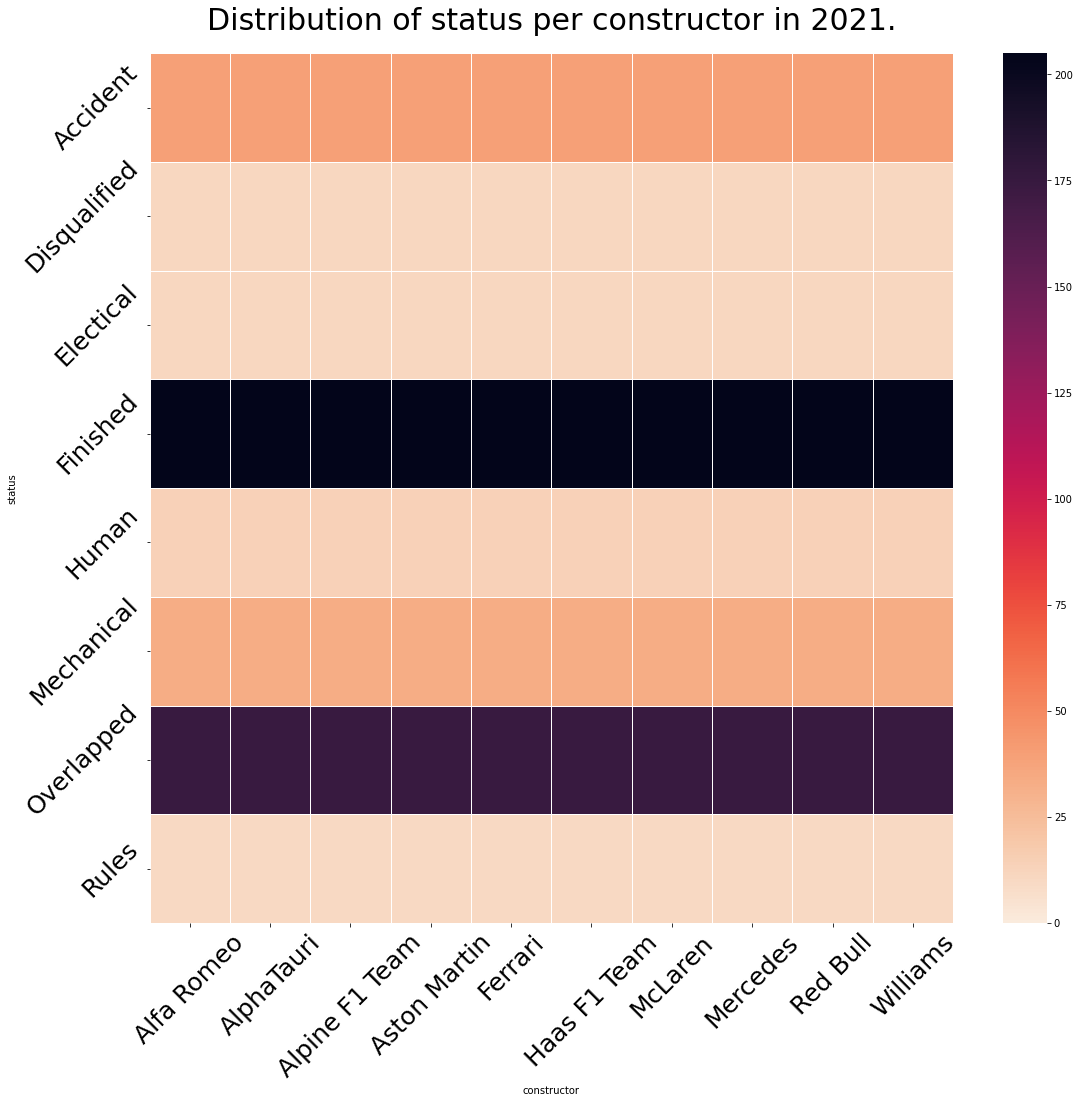

In [87]:
for year in range(2021, 2022, 1):
    data = pipeline_yearly_evolution(year)
    heatmap(data,year)

Here all heatmaps for the years 1950-2021 can be plotted. You can find them all in heatmaps.zip

## 5.8 Look at the relationship between qualifying time and race time

In [88]:
results_df_ = results_df_full.drop(['number', 'position'], axis=1)

df_5 = pd.merge(results_df_, qualifying_df, how='left', 
               on=['raceId','driverId','constructorId']).dropna()


In [90]:
#calculate the fastest lap time in seconds
df_5['fastestLapTimeInSec'] = pd.to_datetime(df_5['fastestLapTime'], format='%M:%S.%f').dt.minute*60 + pd.to_datetime(df_5['fastestLapTime'], format='%M:%S.%f').dt.second + pd.to_datetime(df_5['fastestLapTime'], format='%M:%S.%f').dt.microsecond/1000000

### We want to calculate the qualifying-3 time in seconds and check whether it is correlated with the fastest lap time in seconds

In [91]:
df_5['Q3InSec'] =pd.to_datetime(df_5['q3'],format='%M:%S.%f', errors='coerce').dt.minute*60 + pd.to_datetime(df_5['q3'],format='%M:%S.%f', errors='coerce').dt.second+ (pd.to_datetime(df_5['q3'],format='%M:%S.%f', errors='coerce').dt.microsecond/1000000)

In [92]:
df_5['Q3InSec'] 

0        86.714
1        87.236
2        88.687
4        87.079
22       96.230
          ...  
25383    83.220
25385    83.036
25386    82.931
25388    83.389
25389    83.122
Name: Q3InSec, Length: 2198, dtype: float64

Text(0.5, 1.0, 'Explore Length of Race versus Qualifying time 3')

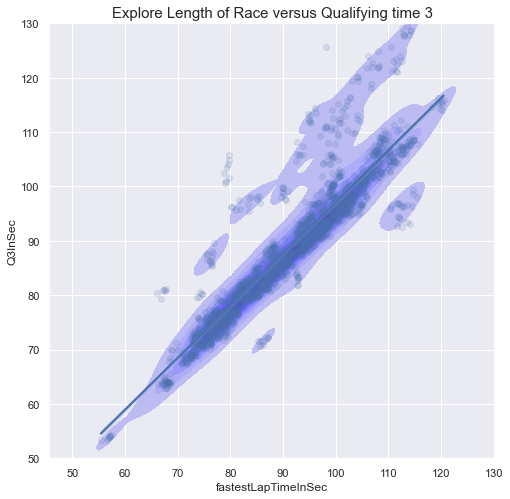

In [93]:
sns.set(rc = {'figure.figsize':(8,8)})
plt.ylim(50, 130)
sns.kdeplot(
    data=df_5, x="fastestLapTimeInSec", y="Q3InSec",color='blue',fill=True)
sns.regplot(x="fastestLapTimeInSec", y="Q3InSec", data=df_5,scatter_kws={'alpha':0.15})
plt.title('Explore Length of Race versus Qualifying time 3', fontsize=15)


### It is commonly believed that qualifying position is indicative of the finishing position, we want to check this relationship through a graph.

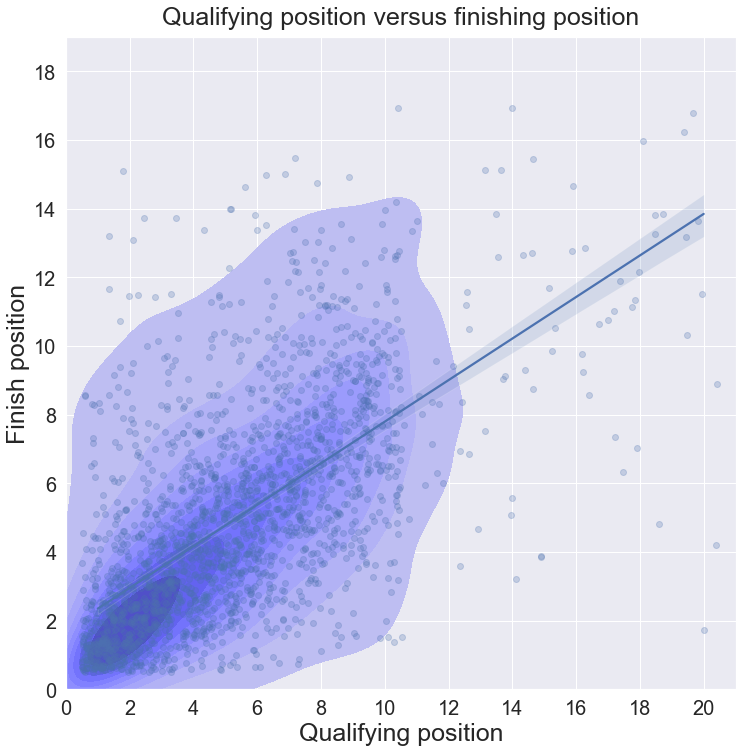

In [95]:
sns.set(rc = {'figure.figsize':(12,12)})

sns.kdeplot(data=df_5, x="position", y="positionOrder",color='blue',fill=True)
# sns.regplot(x="position", y="positionOrder", data=df_5,scatter_kws={'alpha':0.15})
sns.regplot(x="position", y="positionOrder", data=df_5, x_jitter = 0.5, y_jitter = 0.5, scatter_kws = {'alpha' : 1/4})
plt.xticks(np.arange(0,22, 2),fontsize=20)

plt.yticks(np.arange(0,20, 2),fontsize=20)
plt.ylim([0, 19])
plt.xlim([0, 21])
plt.title('Qualifying position versus finishing position',x=0.5, y=1.01,fontsize=25)
plt.ylabel('Finish position',fontsize=25)
plt.xlabel('Qualifying position',fontsize=25);


The graph shows a linear relationship between qualifying position and finishing position. Thus, we want to build a classification model that aims to predict race outcomes using qualifying features.